In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [ ]:
def fcn (t):
  y=[]
  for time in t:
    if time>=-1 and time<1:
      y.append(time+1)
    elif time>=1 and time<=2:
      y.append(1)
  y=np.array(y)
  return y    

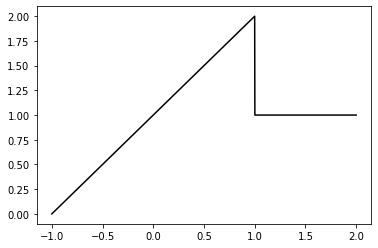

In [ ]:
fs = 1e3
dt = 1 / fs
t_min=-1
t_max=2
number=np.ceil((t_max-t_min)/dt)

t=np.linspace(t_min,t_max,np.int(number))
f_scale = np.linspace(-40,40, t.shape[0])
omega=2*np.pi*f_scale
#_________________________________________________________
signal=fcn(t)
plt.plot(t,signal,'k-')

In [ ]:
def calc_MPE(omega):
  real=np.sinc(omega/np.pi)+2*np.sinc(2*omega/ np.pi)
  #real=(np.sin(omega)+np.sin(2*omega))/omega
  imagin=(np.cos(2*omega)/omega)+(np.cos(omega)/omega)-(2*np.sinc(omega/np.pi)/omega)
  #imagin=(-np.sin(omega)*(omega*np.sin(omega)+2)+omega*np.cos(omega)*(1+np.cos(omega)))/(omega**2)
  magnitude=np.sqrt(real**2+imagin**2)
  phase=np.arctan2(imagin,real)  
  energy=(1/(2*np.pi))*magnitude**2

  return magnitude,phase,energy,real,imagin

def reconstruction(magnitude,phase,f_scale,time):
  signal_rec=[]
  for time in t:
    polar_form=magnitude*np.exp((phase+2*np.pi*f_scale*time)*1j)
    reconstruction=(1/(2*np.pi))*simps(polar_form,2*np.pi*f_scale,2*np.pi*f_scale[1]-2*np.pi*f_scale[0])
    signal_rec.append(reconstruction)
  signal_rec=np.array(signal_rec)
  return signal_rec

def plot_analysis(f_scale,magnitude,phase,energy,real,imagin,xmin,xmax):
  plt.figure(figsize=(10,8))
  plt.subplots_adjust(hspace = .001)

  ax1=plt.subplot(411)
  ax1.plot(2*np.pi*f_scale,real,'k--',label='real')
  ax1.plot(2*np.pi*f_scale,imagin,'r--',label='imaginary')
  ax1.legend()
  ax1.set_xlim(xmin,xmax)
  ax1.set_ylabel('Re{F}, Im{F}')
  ax1.set_xticklabels([])

  ax2=plt.subplot(412)
  ax2.plot(2*np.pi*f_scale,np.abs(magnitude),'k--',label='magnitude')
  ax2.set_ylabel('abs(F)')
  ax2.legend()
  ax2.set_xlim(xmin,xmax)
  ax2.set_xticklabels([])

  ax3=plt.subplot(413)
  ax3.plot(2*np.pi*f_scale,phase*(180/np.pi),'k--',label='phase[deg]')
  ax3.set_ylabel('phase')
  ax3.legend()
  ax3.set_ylim(-360,360)
  ax3.set_xlim(xmin,xmax) 
  ax3.set_xticklabels([])

  ax4=plt.subplot(414)
  ax4.plot(2*np.pi*f_scale,(1/(2*np.pi))*magnitude**2,'k--',label='energy')
  ax4.set_ylabel('abs(F)^2/2pi')
  ax4.set_xlabel('omega [rad/s]')
  ax4.legend()
  ax4.set_xlim(xmin,xmax)
  plt.savefig("ex2.png",dpi=500)

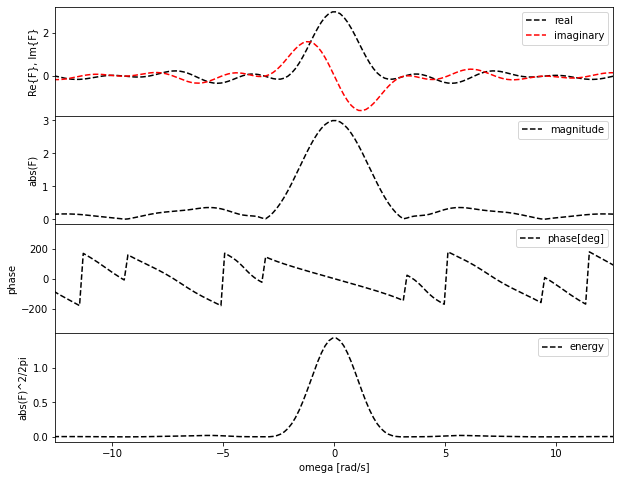

In [ ]:
magnitude,phase,energy,real,imagin=calc_MPE(omega)
plot_analysis(f_scale,magnitude,phase,energy,real,imagin,-2*np.pi*2,2*np.pi*2)

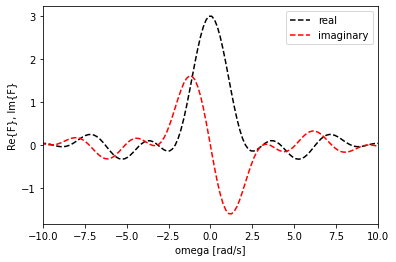

In [ ]:
plt.plot(2*np.pi*f_scale,real,'k--',label='real')
plt.plot(2*np.pi*f_scale,imagin,'r--',label='imaginary')
plt.legend()
plt.xlim(-10,10)
plt.ylabel('Re{F}, Im{F}')
plt.xlabel('omega [rad/s]')
plt.savefig("real_imaginary.png",dpi=500)

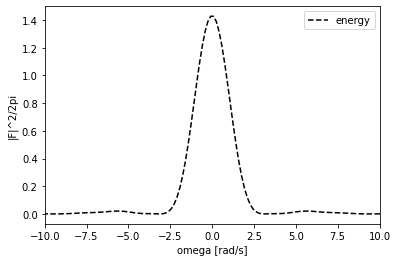

In [ ]:
plt.plot(2*np.pi*f_scale,(1/(2*np.pi))*magnitude**2,'k--',label='energy')
plt.ylabel('|F|^2/2pi')
plt.xlabel('omega [rad/s]')
plt.legend()
plt.xlim(-10,10)
plt.savefig("energy.png",dpi=500)

In [ ]:
signal_rec=reconstruction(magnitude,phase,f_scale,t)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


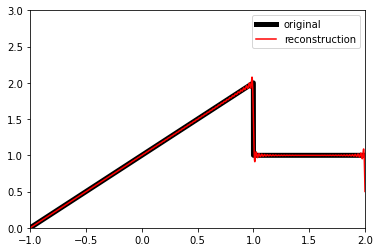

In [ ]:
plt.plot(t,signal,'k-',lw=5.0,label='original')
plt.plot(t,signal_rec,'r-',label='reconstruction')
plt.xlim(-1,2.0)
plt.ylim(0,3.0)
plt.legend()
plt.savefig('reconstruction.png',dpi=500)  

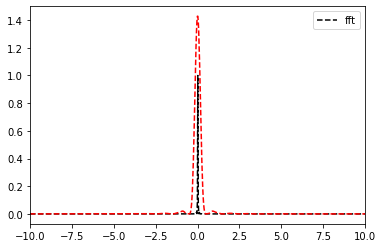

In [ ]:
fourier = np.fft.fftshift(np.fft.fft(signal) / signal.shape[0])
phi = np.angle(fourier)
plt.plot(f_scale, abs(fourier)**2,'k--',label='fft')
plt.plot(f_scale,energy,'r--')
plt.xlim(-10,10)
plt.legend()

In [ ]:
from scipy.integrate import simps
integral_signal=simps(signal**2,t,t[1]-t[0])
integral_spectrum=simps(magnitude**2,f_scale,f_scale[1]-f_scale[0])
integral_spectrum_fft=simps(np.abs(fourier)**2,f_scale,f_scale[1]-f_scale[0])
print(f'energia do sinal: {np.round(integral_signal,2)}, energia do espectro: {np.round(integral_spectrum,2)}, , energia do espectro fft: {np.round(integral_spectrum_fft,2)}')

energia do sinal: 3.67, energia do espectro: 3.66, , energia do espectro fft: 0.03


In [ ]:
from scipy.integrate import simps
integral_signal=simps(signal**2,t,t[1]-t[0])
integral_spectrum=simps(magnitude**2,f_scale,f_scale[1]-f_scale[0])
print(f'energia do sinal: {np.round(integral_signal,2)}, energia do espectro: {np.round(integral_spectrum,2)}')

energia do sinal: 3.67, energia do espectro: 3.66


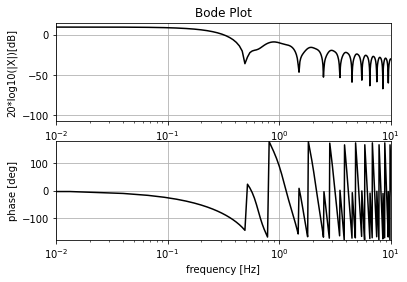

In [ ]:
plt.figure()
plt.subplot(211)
plt.title('Bode Plot')
plt.semilogx(f_scale,20*np.log10(magnitude),'k-')
plt.xlim(0.01,10)
plt.grid()
plt.ylabel('20*log10(|X|)[dB]')
plt.subplot(212)
plt.semilogx(f_scale,phase*(180/np.pi),'k-')
plt.xlim(0.01,10)
plt.ylim(-180,180)
plt.xlabel('frequency [Hz]')
plt.ylabel('phase [deg]')
plt.grid()
plt.savefig('bode.png',dpi=500)

(0.01, 10.0)

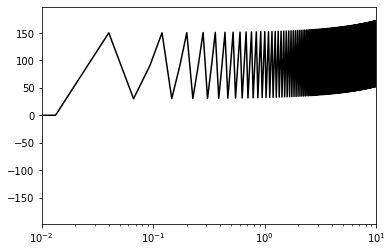

In [ ]:
fft_phase = np.angle(fourier)
plt.semilogx(f_scale, fft_phase*(180/np.pi),'k-')
plt.xlim(1e-2,1e1)